In [1]:
import scipy.io as io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

%matplotlib inline

#### split subsets for dataset

In [2]:
oc = io.loadmat('C:\computer_harddrive\comprehensive\data.mat')
oc = oc['data']
oc['chl'][0,0][:,0]
var = ['chl','sst','sal','time','lat','lon','slope_hgt','slope_ang','slope_mlz125','slope_mlz05',
      'slope_sst','slope_sal','slope_vel','or_hgt','or_ang','or_mlz125','or_mlz05',
      'or_sst','or_sal','or_vel']

In [3]:
def parse_df(oc,var):
    df = pd.DataFrame(index=oc['time'][0,0][:,0])
    for v in var:
        df[v]=oc[v][0,0][:,0]
    return df

In [4]:
df = parse_df(oc,var)
df = df.replace(0, np.nan)
df.head()

,chl,sst,sal,time,lat,lon,slope_hgt,slope_ang,slope_mlz125,slope_mlz05,slope_sst,slope_sal,slope_vel,or_hgt,or_ang,or_mlz125,or_mlz05,or_sst,or_sal,or_vel
193.0995,0.045252,14.718542,31.880777,193.0995,58.875,-148.375,-0.021,-11.503545,10.0,NaN,-1.975,0.202,-0.001743,0.468,57.159596,20.0,NaN,12.127,31.901,0.017141
193.1335,0.179702,15.421827,31.870130,193.1335,58.875,-148.125,-0.023,-7.070511,10.0,NaN,-1.824,0.219,-0.000165,0.494,60.861589,20.0,NaN,12.208,31.898,0.039685
193.1850,0.220321,15.158623,31.866798,193.1850,58.625,-147.875,NaN,-13.481335,10.0,NaN,-1.618,0.174,0.006361,0.572,-86.364020,20.0,NaN,12.341,31.908,0.089762
193.2450,0.211592,15.107993,31.985581,193.2450,58.375,-147.625,0.024,-0.221393,10.0,NaN,-1.541,0.098,-0.008672,0.574,-46.769551,20.0,NaN,12.518,31.961,0.189293
193.2205,0.449800,15.203355,31.951723,193.2205,58.625,-147.625,0.006,-11.487999,10.0,NaN,-1.454,0.179,0.024328,0.634,-88.860745,20.0,NaN,12.460,31.831,0.123953


In [233]:
key = ['chl','lat','lon','sst','sal','time','slope_hgt','slope_ang',
      'slope_sst','slope_sal','slope_vel','or_hgt','or_ang','or_mlz125',
      'or_sst','or_sal','or_vel']
subdf=df[key]
subdf= subdf.dropna()
# keep subdf as the original dataset

key = ['lat','lon']
loc=subdf[key]
#loc is only for the mapping

key = ['sst','sal','slope_hgt',
      'slope_sst','slope_sal','slope_vel','or_hgt','or_mlz125',
      'or_sst','or_sal','or_vel']
clusterdf=subdf[key]
clusterdf.head()

,sst,sal,slope_hgt,slope_sst,slope_sal,slope_vel,or_hgt,or_mlz125,or_sst,or_sal,or_vel
193.0995,14.718542,31.880777,-0.021,-1.975,0.202,-0.001743,0.468,20.0,12.127,31.901,0.017141
193.1335,15.421827,31.870130,-0.023,-1.824,0.219,-0.000165,0.494,20.0,12.208,31.898,0.039685
193.2450,15.107993,31.985581,0.024,-1.541,0.098,-0.008672,0.574,20.0,12.518,31.961,0.189293
193.2205,15.203355,31.951723,0.006,-1.454,0.179,0.024328,0.634,20.0,12.460,31.831,0.123953
193.3085,14.824038,31.991093,-0.003,-1.295,0.058,-0.001836,0.460,20.0,12.356,32.098,0.232193


In [238]:
# cluster and show map
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
Z = linkage(clusterdf, method = 'ward')
Z.shape
k = 4
clusters = fcluster(Z, k, criterion='maxclust') #cluster nums
clusters[np.where(clusters==4)]=2

SyntaxError: can't assign to function call (<ipython-input-238-dec261414529>, line 8)

C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


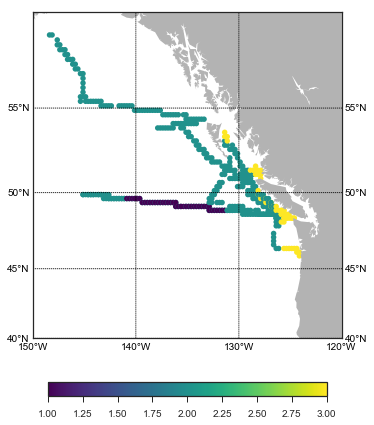

In [245]:
from mpl_toolkits.basemap import Basemap, cm
plt.figure(figsize=(10, 8))
#ax=fig.add_axes([.1,.1,.8,.8])                
m = Basemap(llcrnrlon=-150.,llcrnrlat=40.,urcrnrlon=-120,urcrnrlat=60,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=55,lon_0=-130)
m.fillcontinents(color='0.7')# #cc9966
#m.shadedrelief()
#m.drawcoastlines()
m.drawparallels(np.arange(10,90,5),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,10),labels=[1,1,0,1])

x,y=m(loc.iloc[:,1].values, loc.iloc[:,0].values)
cs=m.scatter(x, y, c=clusters, 
             cmap='viridis',edgecolors='None', s=30)
cbar=plt.colorbar(cs,orientation='horizontal', 
                  shrink=0.5, pad=0.10)
cbar.ax.tick_params(labelsize=10)
plt.show()

In [271]:
# show PCA of each clusters
subdf['clusters']=clusters
modeldf=subdf[subdf['clusters']==2]
key = ['sst','sal','slope_hgt','chl',
      'slope_sst','slope_sal','slope_vel','or_hgt','or_mlz125',
      'or_sst','or_sal','or_vel']
modeldf = modeldf[key]
key = ['sst','sal','slope_hgt',
      'slope_sst','slope_sal','slope_vel','or_hgt','or_mlz125',
      'or_sst','or_sal','or_vel']
y = modeldf['chl']
x = modeldf[key]
x.size

3982

In [264]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#x_train, x_test = x[:400], x[400:]
#y_train, y_test = y[:400], y[400:]
# Build a forest and compute the feature importances
forest = RandomForestRegressor(n_estimators=250,
                              random_state=0)

forest.fit(x_train, y_train)

# get the feature importance
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# get the score
predictions = forest.predict(x_test)
print(r2_score(y_test,predictions), mean_absolute_error(y_test,predictions))

0.746127283049 0.30407065919


Feature ranking:
1. feature or_sal (0.317867)
2. feature slope_sal (0.193279)
3. feature sst (0.151558)
4. feature slope_hgt (0.090802)
5. feature or_hgt (0.057297)
6. feature slope_sst (0.051855)
7. feature sal (0.046974)
8. feature slope_vel (0.035874)
9. feature or_sst (0.027931)
10. feature or_vel (0.025853)
11. feature or_mlz125 (0.000709)


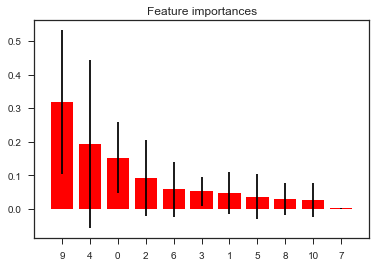

In [265]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, key[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

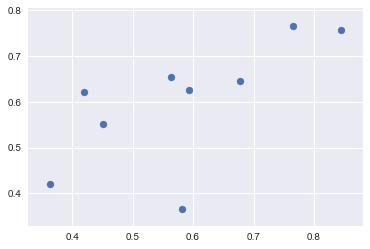

In [191]:
plt.scatter(y_test, predictions)
#plt.xlim(0, 2)
#plt.ylim(0, 2)

Feature 1 max 1.33915334866
Feature 1 min 0.209000111137
Feature 2 max 12.0872138182
Feature 2 min 0.0166478721026
Feature 3 max 11.7616969688
Feature 3 min 0.0328021936496


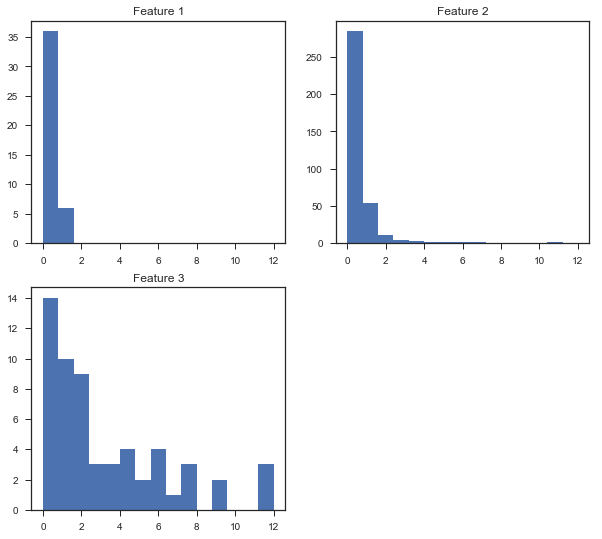

In [269]:
sns.set_style("ticks")
fig = plt.figure(figsize=(10, 9))
for i in np.arange(3):
    num = 221+i
    ax = fig.add_subplot(num) 
    chl=subdf[subdf['clusters']==i+1]
    plt.hist(chl['chl'], bins=15, range=(0,12))
    ax.set_title('Feature %s' % (str(i+1)))
    print('Feature', str(i+1),'max',chl['chl'].max())
    print('Feature', str(i+1),'min',chl['chl'].min())


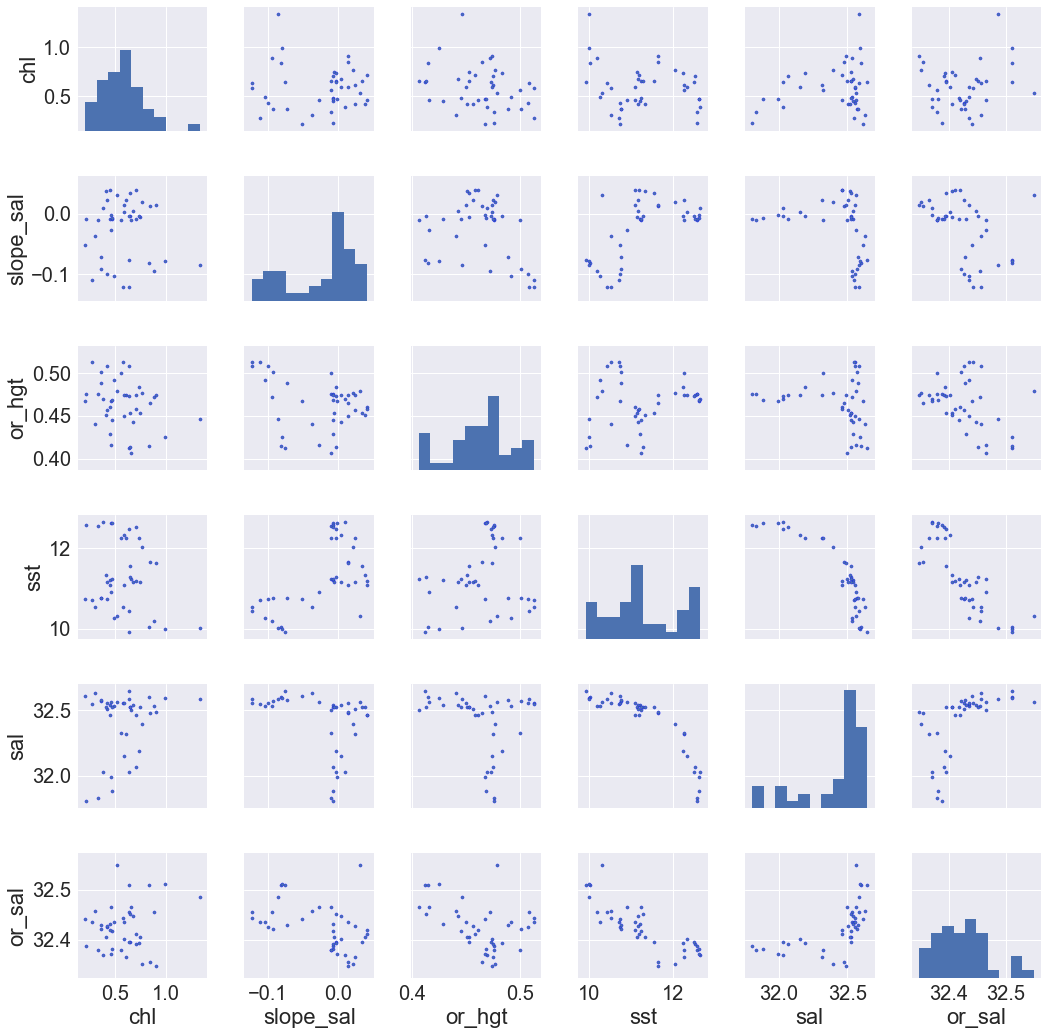

In [298]:
modeldf=subdf[subdf['clusters']==1]
key1=['chl','sst','or_vel','slope_vel','slope_sst','slope_hgt']
key2=['chl','or_sal','slope_sal','sst','slope_hgt','or_hgt']
key3=['chl','slope_sal','or_hgt','sst','sal','or_sal']
sns.set(font_scale=2)
sns.pairplot(modeldf[key3], plot_kws=dict(s=10, edgecolor="b"))
#plt.show();

In [305]:
subdf['micro'] = 1./ (0.9117 + np.exp (-2.7330*np.log10(subdf['chl']) + 0.4003))
subdf['diatom'] = 1./ (1.3272 + np.exp (-3.9828*np.log10(subdf['chl']) + 0.1953)) 
subdf['dino'] = subdf['micro']-subdf['diatom']
subdf['pico'] = (-1./ (0.1529 + np.exp (1.0306* np.log10(subdf['chl']) 
                                         - 1.5576)) - 1.8597*np.log10(subdf['chl']) +2.9954)
subdf['prokaryotes'] = ((0.0067/0.6154/subdf['chl'])*np.exp(-19.5190*((np.log10(subdf['chl']) + 0.9643)**2)/(0.0067**2)) 
                  + 0.1027*(np.log10(subdf['chl'])**2) -0.1189*np.log10(subdf['chl']) +0.0626)
subdf['picoeukaryotes'] = subdf['pico']-subdf['prokaryotes']
subdf['nano'] = 1-subdf['pico']-subdf['micro']
subdf['greenalgae'] = (0.2490/subdf['chl']) * np.exp(-1.2621*(
        np.log10(subdf['chl'])-0.5523)**2)
subdf['prymnesiophytes'] = subdf['nano']-subdf['greenalgae']

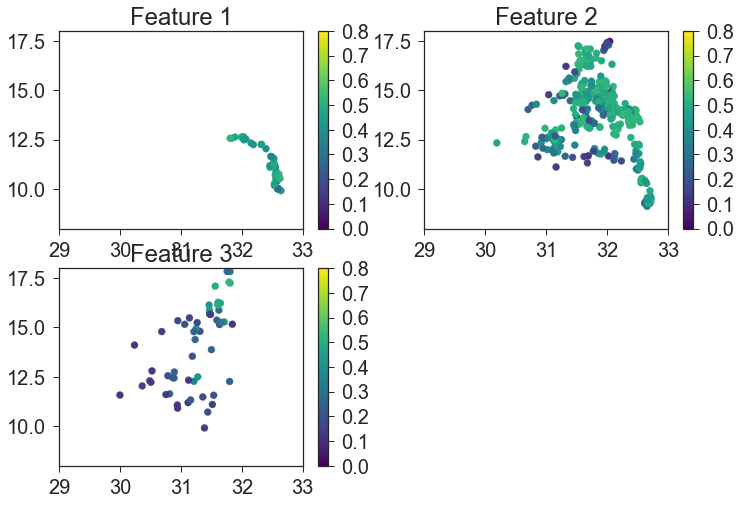

In [321]:
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 8))
for i in np.arange(3):
    num = 221+i
    ax = fig.add_subplot(num) 
    modeldf=subdf[subdf['clusters']==i+1]
    plt.scatter(modeldf['sal'],modeldf['sst'],c=modeldf['nano'],cmap='viridis',
               vmin=0, vmax=0.8)
    plt.colorbar()
    plt.xlim([29, 33])
    plt.ylim([8, 18])
    ax.set_title('Feature %s' % (str(i+1)))


C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3236: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
C:\Users\user\Anaconda3\lib\site-packages\mpl_toolkits\basemap\__init__.py:3245: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


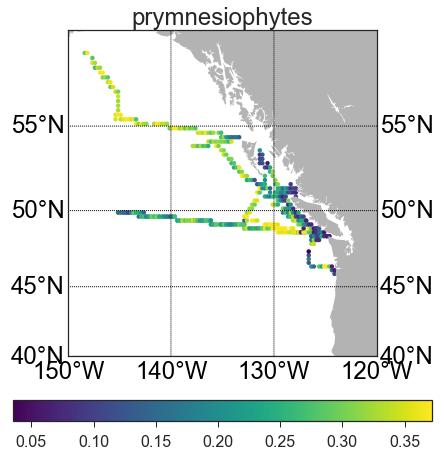

In [341]:
from mpl_toolkits.basemap import Basemap, cm
key='prymnesiophytes'
plt.figure(figsize=(15, 8))
#ax=fig.add_axes([.1,.1,.8,.8])                
m = Basemap(llcrnrlon=-150.,llcrnrlat=40.,urcrnrlon=-120,urcrnrlat=60,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',projection='merc',\
            lat_0=55,lon_0=-130)
m.fillcontinents(color='0.7')# #cc9966
#m.shadedrelief()
#m.drawcoastlines()
m.drawparallels(np.arange(10,90,5),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180,180,10),labels=[1,1,0,1])

x,y=m(subdf['lon'].values, subdf['lat'].values)
cs=m.scatter(x, y, c=subdf[key].values, 
             cmap='viridis',edgecolors='None', s=20)
cbar=plt.colorbar(cs,orientation='horizontal', 
                  shrink=0.5, pad=0.10)
cbar.ax.tick_params(labelsize=16)
plt.title(key)
plt.show()